In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import subprocess

In [2]:
def read_data(dataset):
    with open("output/" + dataset + ".txt") as f:
        y_true=list(map(int, f.readline().split()))
        y_pred=list(map(int, f.readline().split()))
        return np.array(y_true, dtype=int), np.array(y_pred, dtype=int)

def dispplay_matrix(y_true, y_pred, mappings):
    cf = confusion_matrix(y_true, y_pred)
    labels_cnt = len(mappings)
    display = ConfusionMatrixDisplay(cf, [mappings[i] for i in range(labels_cnt)])
    fig = plt.figure(figsize=(14, 9))
    accuracy = accuracy_score(y_true, y_pred)
    display.plot(ax=fig.add_subplot(111), values_format="d")
    plt.show()
    print("Accuracy: " + "{0:.5f}".format(accuracy))

In [3]:
def run_model(dataset, epochs):
    subprocess.run(["cmake-build-release/cnn", dataset, str(epochs)])

In [4]:
fashion_mappings = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
digits_mappigs = dict([(i, str(i)) for i in range(10)])

In [5]:
run_model("digits", 4)

In [6]:
digits_true, digits_pred = read_data("digits")

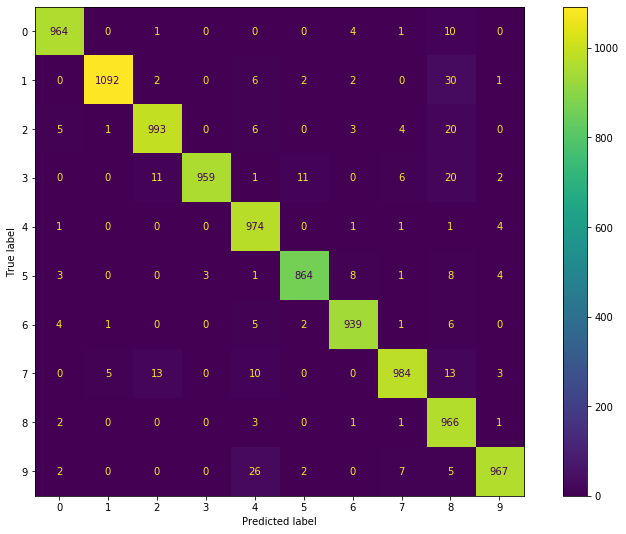

Accuracy: 0.97020


In [7]:
dispplay_matrix(digits_true, digits_pred, digits_mappigs)

In [8]:
run_model("fashion", 3)

In [9]:
fashion_true, fashion_pred = read_data("fashion")

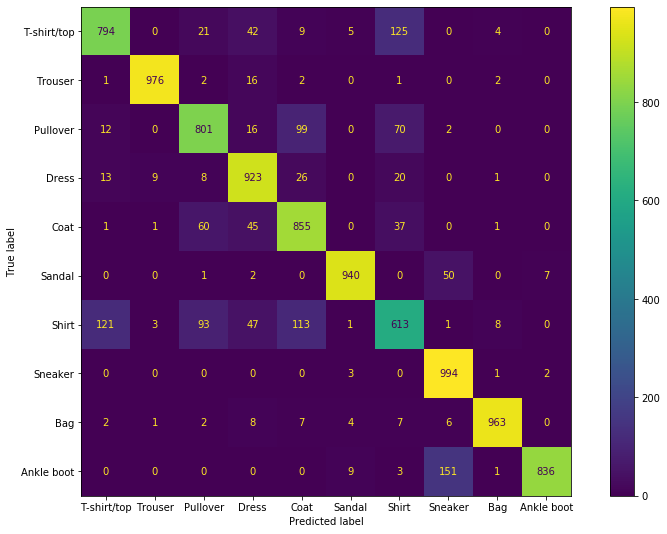

Accuracy: 0.86950


In [11]:
dispplay_matrix(fashion_true, fashion_pred, fashion_mappings)